# 2022 wrapped! (for credit cards only right now)



In [ ]:
!pwd #should display '/content'

/content


- create a new folder called "data" and a folder under data with your name
- import your yearly CSVs into a folder a with your name under data. for example, my path is /content/data/jingu

label your files: 
{cardName}_2022.csv

In [ ]:
import pandas as pd

#ENTER YOUR FOLDER NAME HERE:
name = "vishnu"

#this is your path to access your file
path = '/content/data/' + name

**if you have American Express cards, donwload your CSV from **

[here](https://www.americanexpress.com/us/customer-service/faq.year-end-summary-statement.html)

In [ ]:
amex_df = pd.read_csv(path + '/amex_gold_2022.csv')

if you have multiple cards from one issuer (like I do with Chase, download all the year end summaries as CSVs anyway and we can combine them later)

In [ ]:
sapphire_df = pd.read_csv(path + '/sapphire_2022.CSV')
ink_df = pd.read_csv(path + '/ink_2022.CSV')
freedom_df = pd.read_csv(path + '/freedom_2022.CSV')

In [ ]:
# those are my chase cards which are labeled according to the card product

In [ ]:
aa_df = pd.read_csv(path + '/aa_business_2022.csv')

# also had a barclays AA business card. the csv from this is weird
#so i fixed up the categories to match. 
# repeat this for as many other cards as you have

In [ ]:
#create a new_df to combine all the transactions from all cards for the year

new_df = pd.DataFrame()
new_df['Transaction Date'] = sapphire_df['Transaction Date']
new_df['Amount'] = sapphire_df['Amount']
new_df['Category'] = sapphire_df['Category']
new_df['Description'] = sapphire_df['Description']

In [ ]:
new_df = new_df.append(ink_df[['Transaction Date', 'Amount', 'Category', 'Description']], ignore_index=True)
new_df = new_df.append(freedom_df[['Transaction Date', 'Amount', 'Category', 'Description']], ignore_index=True)
new_df = new_df.append(aa_df[['Transaction Date', 'Amount', 'Category', 'Description']], ignore_index=True)
amex_df['Amount']*=-1 # this is because amex counts spending in the positive direction, do this for any issuer in which spending is a positive instead of negative value
new_df = new_df.append(amex_df[['Transaction Date', 'Amount', 'Category', 'Description']], ignore_index=True)

new_df['Amount']*=-1 #now i want to make everything positive spending so it makes sense

# i only want to count spending and not subtract the payments i made to the card for now, obvi

mask = ~new_df['Category'].isin(['Payment', 'AUTOPAY PAYMENT - THANK YOU']) & ~new_df['Description'].isin(['Payment', 'AUTOPAY PAYMENT - THANK YOU', 'Payment Thank You-Mobile', 'Payment Thank You - Web'])

# use the mask to filter the dataframe
filtered_df = new_df[mask]

In [ ]:
#sort
sorted_df = filtered_df.sort_values(by='Transaction Date')

In [ ]:
ex_file = path + '/export.csv'

In [ ]:
sorted_df.to_csv(ex_file, index=False)

In [ ]:
print('total: $', sorted_df['Amount'].sum())

total: $ 36070.47


# Yearly spending by month

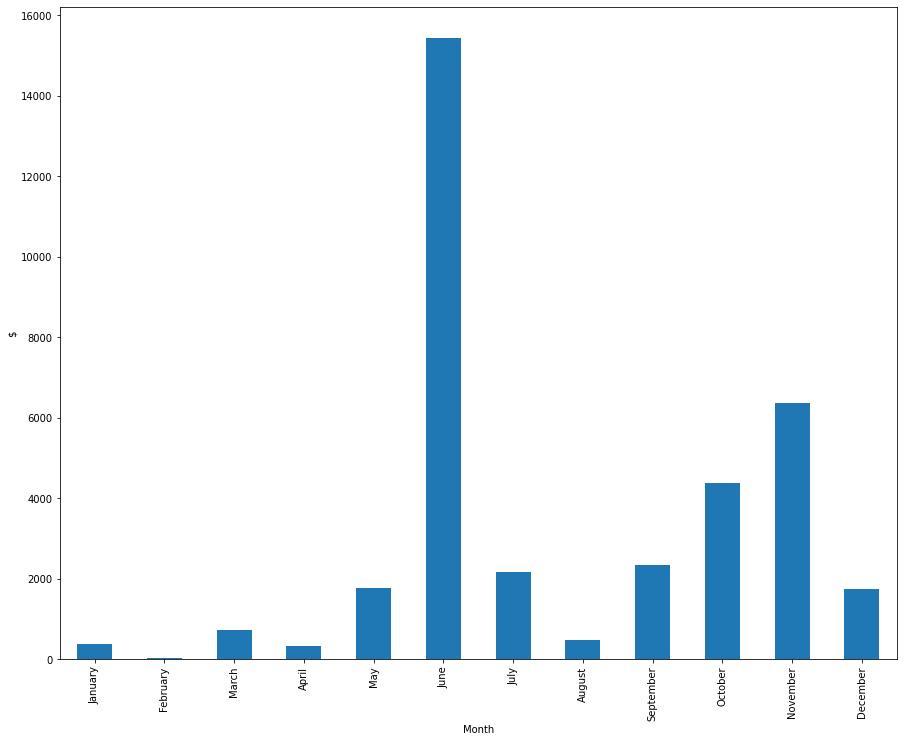

In [ ]:
import matplotlib.pyplot as plt
import calendar

# create a new column that shows the month of each transaction
sorted_df['Month'] = pd.to_datetime(sorted_df['Transaction Date']).dt.month

# group the data by month and sum the Amount column
monthly_spending = sorted_df.groupby('Month')['Amount'].sum()

# create a dictionary mapping month numbers to month names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

monthly_spending.index = [month_names[i] for i in monthly_spending.index]

# create a bar plot of the monthly spending
monthly_spending.plot(kind='bar', figsize = (15,12))

# set the x-axis label
plt.xlabel('Month')

# set the y-axis label
plt.ylabel('$')

# show the plot
plt.show()

# Yearly spending by **category**

In [ ]:
df = sorted_df
category_spending = df.groupby('Category')['Amount'].sum()
positive_spending = category_spending[category_spending > 0]

# display(positive_spending)

## training set to normalize

adjust yours according to what you want your main categories to be. just feed all your categories into GPT and ask it to make it common sense. will use the API once i have enough data for this

In [ ]:
#training set to normalize my categories, adjust yours according to what your main categories are.
# this will be fixed so that NLP knows how to do this no problem

category_mapping = {
    'Airline': 'Travel',
    'Automotive': 'Tesla',
    'Business Services-Health Care Services': 'Business Services',
    'Business Services-Insurance Services': 'Business Services',
    'Business Services-Internet Services': 'Business Services',
    'Business Services-Mailing & Shipping': 'Business Services',
    'Business Services-Other Services': 'Business Services',
    'CREDIT': 'Miscellaneous',
    'Communications-Mobile Telecom': 'Communications',
    'Communications-Other Telecom': 'Communications',
    'DEBIT': 'Miscellaneous',
    'Education': 'Education',
    'Entertainment': 'Entertainment',
    'Entertainment-Other Entertainment': 'Entertainment',
    'Entertainment-Theatrical Events': 'Entertainment',
    'Fees & Adjustments': 'Fees & Adjustments',
    'Fees & Adjustments-Fees & Adjustments': 'Fees & Adjustments',
    'Food & Drink': 'Food & Drink',
    'Gas': 'Transportation',
    'Gifts & Donations': 'Gifts & Donations',
    'Groceries': 'Shopping',
    'Health & Wellness': 'Health & Wellness',
    'Merchandise & Inventory': 'Shopping',
    'Miscellaneous': 'Miscellaneous',
    'Office & Shipping': 'Office & Shipping',
    'Other-Miscellaneous': 'Other',
    'Professional Services': 'Professional Services',
    'Repair & Maintenance': 'Repair & Maintenance',
    'Shopping': 'Shopping',
    'Shopping-Arts & Jewelry': 'Shopping',
    'Shopping-Book Stores': 'Shopping',
    'Shopping-Clothing Stores': 'Shopping',
    'Shopping-Computer Supplies': 'Shopping',
    'Shopping-Department Stores': 'Shopping',
    'Shopping-General Retail': 'Shopping',
    'Shopping-Groceries': 'Shopping',
    'Shopping-Internet Purchase': 'Shopping',
    'Shopping-Pharmacies': 'Shopping',
    'Shopping-Sporting Goods Stores': 'Shopping',
    'Shopping-Wholesale Stores': 'Shopping',
    'Transportation-Auto Services': 'Transportation',
    'Transportation-Fuel': 'Transportation',
    'Transportation-Taxis & Coach': 'Ubers',
    'Transportation-Vehicle Leasing & Purchase': 'Tesla',
    'Travel': 'Travel',
    'Travel- Agencies' : 'Travel', 
    'Travel-Travel Agencies:' : 'Travel' 
}

## map the main "common sense" categories



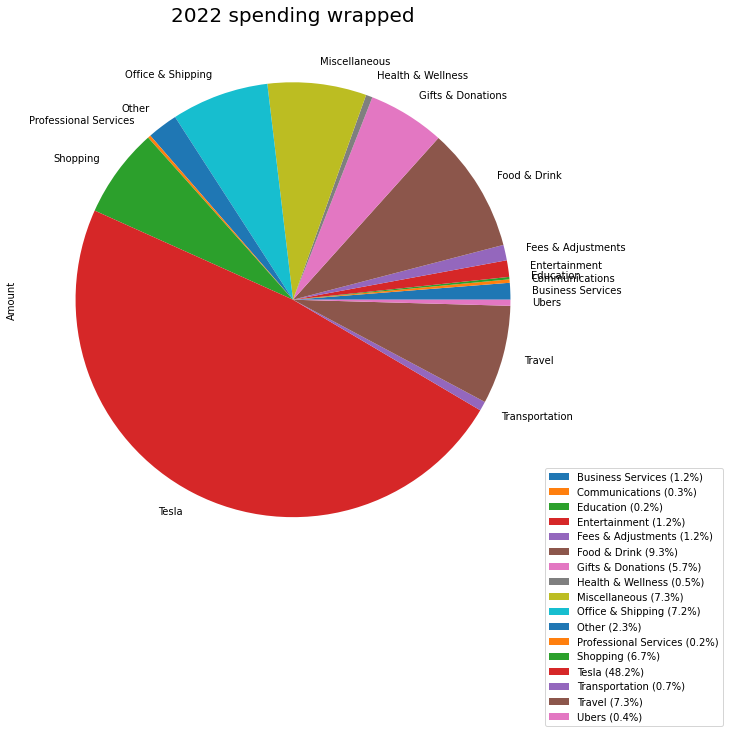

In [ ]:
df['Main Category'] = df['Category']

# map the values in the 'Category' column to their corresponding main categories
df['Main Category'] = df['Main Category'].map(category_mapping)

category_spending = df.groupby('Main Category')['Amount'].sum()

# filter the category_spending dataframe to select rows with positive values in the Amount column
positive_spending = category_spending[category_spending > 0]

# create a pie plot of the category spending
positive_spending.plot(kind='pie', labels=positive_spending.index, autopct=None, figsize=(10, 10), fontsize=10)

# set the title of the plot
plt.title('2022 spending wrapped', fontsize=20)

# add a legend with the percentage values and position it outside of the plot
plt.legend(labels=['{} ({:.1f}%)'.format(i, j) for i, j in zip(positive_spending.index, positive_spending.values / positive_spending.sum() * 100)],
           bbox_to_anchor=(1.3, 0.2))

# show the plot
plt.show()